##round 2

   WELL SAMPLE_x OLIGO_ID_x     AREA_x OLIGO_ID_y     AREA_y       ASE      T
10  C12     CTL2          G   0.346516          A   0.433489  0.799365   True
24  D01    HC1_1          G   6.399528          A   9.467199  0.675968  False
15  D02    HC1_2          G   5.675909          A  10.444198  0.543451  False
46  D03    HC2_3          G   6.965277          A   8.109815  0.858870  False
35  D05    HC4_2          G   5.448055          A   8.787638  0.619968  False
45  D06    HC4_3          G   6.580420          A  10.243054  0.642428  False
23  D10    HC6_1          G   7.576630          A   9.872396  0.767456  False
0   D09    HC6_3          G   6.931531          A   9.526989  0.727568  False
3   D11    HC7_2          G   4.742897          A   9.511461  0.498651  False
6   D12    HC7_3          G   8.189017          A  13.120369  0.624145  False
18  A04   HT10_1          G   3.956556          A   7.229927  0.547247   True
30  A05   HT10_2          G   2.593630          A   8.057875  0.

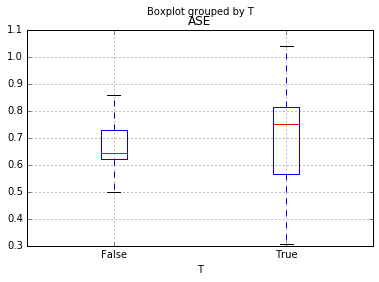

In [1]:
import matplotlib.pyplot as P
%matplotlib inline
import numpy as np
import pandas as pd


RNA = ['A','B','C','D'] #These are wells that contain cDNA
D = pd.read_csv("round2/iPLEX_HYBRID_MAPHIG_6_24_16.csv")
#focus on UTR SNP
cyp9k1 = D.loc[D['Assay']=='CYP9K1-3u']
#grab only cDNA
#cyp9k1 = cyp9k1.loc[cyp9k1['WELL'].str[0].isin(RNA)]
cyp9k1 = cyp9k1.loc[cyp9k1['WELL'].str[0].isin(['A','B','C','D'])]

cyp2 = cyp9k1.loc[cyp9k1['OLIGO_ID']=='A']
cyp1 = cyp9k1.loc[cyp9k1['OLIGO_ID']=='G']

ASE = pd.merge(cyp1,cyp2,on='WELL').sort_values(by='SAMPLE_x')
ASE.drop(ASE.columns[[2,3,6,7,8,9,12]], axis=1, inplace=True)

#.sort_values(by='WELL')
ASE['ASE'] = ASE['AREA_x']/ASE['AREA_y']
#print(ASE[['SAMPLE_x','ASE']])

ASE['T'] = ASE['SAMPLE_x'].str[1]=="T"

#Drop inf and NaN samples
ASE = ASE.drop([47,5,12,43,20,41])
print(ASE)
ASE.boxplot(column='ASE',by='T')

#control = ASE.loc[ASE['SAMPLE_x'].str[1]=="C"]
#treat = ASE.loc[ASE['SAMPLE_x'].str[1]=="T"]

#control.boxplot(column='ASE')
#print(treat)



/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


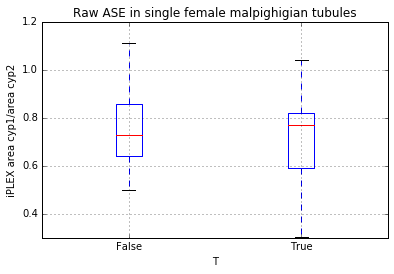

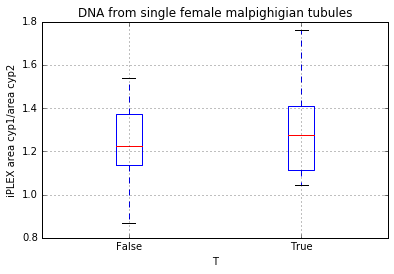

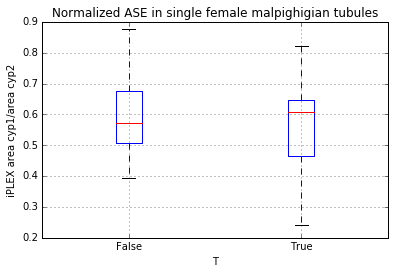

In [8]:
import matplotlib.pyplot as P
%matplotlib inline
import numpy as np
import pandas as pd
import math
#CYP9K1 3'UTR SNP G=cyp1 ; A=cyp2

##Round 1
D = pd.read_table("pig_iplex_june9.txt")
#focus on UTR SNP
r1 = D.loc[D['Assay']=='CYP9K1-3u']

r1cyp2 = r1.loc[r1['OLIGO_ID']=='A']
r1cyp1 = r1.loc[r1['OLIGO_ID']=='G']

r1df = pd.merge(r1cyp1,r1cyp2,on='WELL').sort_values(by='SAMPLE_x')
#remove unnecessary columns
r1df.drop(r1df.columns[[2,3,6,7,8,9,12]], axis=1, inplace=True)
#grab only cDNA
r1df['cDNA'] = r1df['WELL'].str[0].isin(['A','B'])#These are wells that contain cDNA
r1df = r1df.loc[r1df['AREA_y']>0.00001]
r1df['T'] = r1df['SAMPLE_x'].str[10]=="T"
#print('r1',len(r1df),r1df)

##Round 2
D2 = pd.read_csv("round2/iPLEX_HYBRID_MAPHIG_6_24_16.csv")
#focus on UTR SNP
r2 = D2.loc[D2['Assay']=='CYP9K1-3u']

r2cyp2 = r2.loc[r2['OLIGO_ID']=='A']
r2cyp1 = r2.loc[r2['OLIGO_ID']=='G']

r2df = pd.merge(r2cyp1,r2cyp2,on='WELL').sort_values(by='SAMPLE_x')
r2df.drop(r2df.columns[[2,3,6,7,8,9,12]], axis=1, inplace=True)

#highlight cDNA
r2df['cDNA'] = r2df['WELL'].str[0].isin(['A','B','C','D'])#These are wells that contain cDNA
#drop samples that didn't amplify well
r2df = r2df.loc[r2df['AREA_y']>0.00001]
r2df['T'] = r2df['SAMPLE_x'].str[1]=="T"

#concatenate 1st and 2nd iPLEX run data
ALL = pd.concat([r1df,r2df])

#Calculate ASE cyp1/cyp2
ALL['ASE'] = ALL['AREA_x']/ALL['AREA_y']
#Drop inf and NaN samples
ALL = ALL.drop([13,17,76,80,85])
##print('all',len(ALL))

#plot raw ASE on cDNA samples
RNA = ALL.loc[ALL['cDNA']==True]
##print(len(RNA))
RNA.boxplot(column='ASE',by='T')
P.title('Raw ASE in single female malpighigian tubules')
P.suptitle("")
P.ylabel("iPLEX area cyp1/area cyp2")
#Estimate amplification bias from ASE on DNA
allelic_bias = ALL.loc[ALL['cDNA']==False]
##print(len(allelic_bias))
allelic_bias.boxplot(column='ASE',by='T')
P.title('DNA from single female malpighigian tubules')
P.suptitle("")
norm_factor = allelic_bias['ASE'].mean()
P.ylabel("iPLEX area cyp1/area cyp2")
#Plot ASE normalized by the mean allelic bias in DNA (assumes no sample-specific bias for now)
RNA['Nase'] = RNA['ASE']/norm_factor
#print(len(RNA))
RNA.boxplot(column='Nase',by='T')
#print('median',RNA['Nase'].median)
#print(RNA['Nase'].median())
P.title('Normalized ASE in single female malpighigian tubules')
P.suptitle("")
#P.semilogy()
P.ylabel("iPLEX area cyp1/area cyp2")
#print(RNA)

In [18]:
#print(RNA.describe())
t = RNA.loc[RNA['T']==True]
c = RNA.loc[RNA['T']==False]
print("C",c.describe())
print("T",t.describe())

C           AREA_x     AREA_y  cDNA      T        ASE       Nase
count  13.000000  13.000000    13     13  13.000000  13.000000
mean    6.431606   8.769209     1      0   0.756313   0.595779
std     0.914795   1.426196     0      0   0.182477   0.143744
min     4.742897   5.491794  True  False   0.498651   0.392808
25%     5.982958   8.282073     1      0   0.642428   0.506067
50%     6.399528   9.133885     1      0   0.727568   0.573135
75%     6.931531   9.526989     1      0   0.858870   0.676567
max     8.220270  10.444198  True  False   1.112846   0.876635
T           AREA_x     AREA_y  cDNA     T        ASE       Nase
count  39.000000  39.000000    39    39  39.000000  39.000000
mean    7.032099  10.090717     1     1   0.711257   0.560286
std     2.404755   3.051784     0     0   0.176052   0.138684
min     0.346516   0.433489  True  True   0.304951   0.240223
25%     5.641328   7.855647     1     1   0.589368   0.464269
50%     7.094964  10.409040     1     1   0.771695   0.60